# 의사결정나무

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [118]:
#파일 불러오기
df_raw = pd.read_csv("3. Big Data 분석/유방암.csv", engine='python', encoding='cp949')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [119]:
# diagnosis 변수 "양성" or "음성"을 1과 0으로 바꾼다.
df_raw["diagnosis"] = np.where(df_raw["diagnosis"] == "양성", 0, 1)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,1,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,0,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,1,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,0,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,0,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [120]:
df_raw.isnull().sum(axis = 0) #결측치 개수 확인 -> 결측치가 없으므로 처리 불필요

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [121]:
# 목표 변수 diagnosis를 y로 설정하고 나머지 변수들을 x로 나눈다.
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234)

In [122]:
# 트레이닝 셋에 대해 100%로 과적합이 발생했다.
tree_uncusomized = DecisionTreeClassifier(random_state = 1234)
tree_uncusomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncusomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncusomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.883


In [123]:
# 트리의 깊이(Depth)를 조정한다.
# depth 4부터 트레이닝 정확도와 테스트 데이터가 고정되어 더 이상 증가하지 않음을 알 수 있다.
train_accuracy = []
test_accuracy = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth=v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.932,0.852
1,2,0.979,0.875
2,3,0.995,0.875
3,4,1.000,0.883
4,5,1.000,0.883
5,6,1.000,0.883
6,7,1.000,0.883
7,8,1.000,0.883
8,9,1.000,0.883
9,10,1.000,0.883


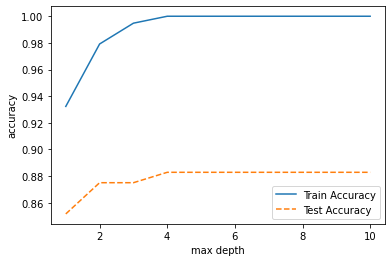

In [124]:
# depth 4부터 계속 일정하게 유지되는 것을 알 수 있다.
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend()

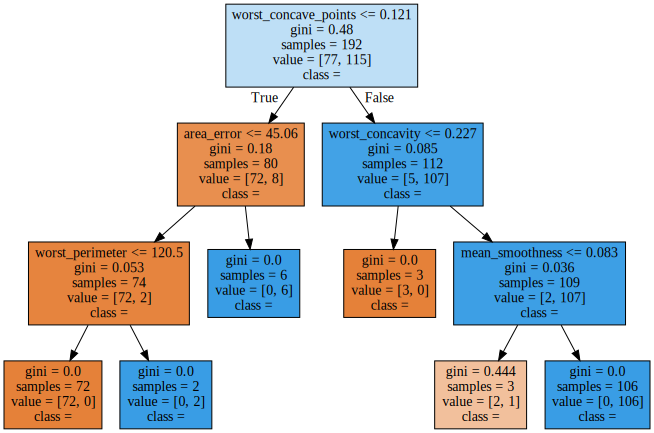

In [125]:
# depth = 2인 의사결정나무를 그린다.
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(max_depth = 3, random_state=1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["양성", "음성"],
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

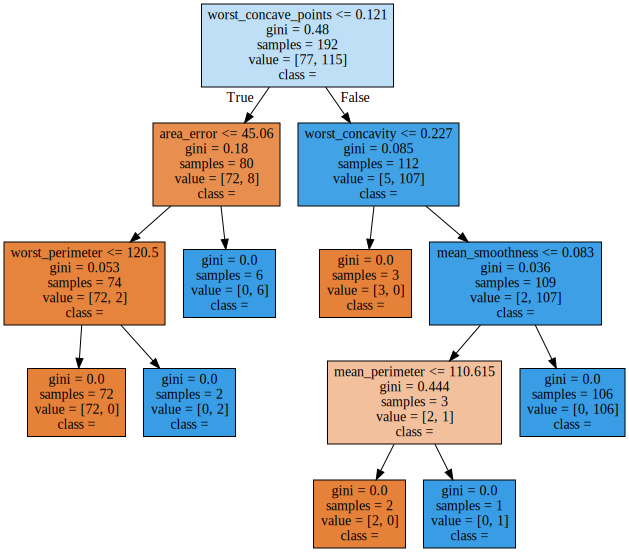

In [126]:
# depth = 4인 의사결정나무를 그린다.
tree_high = DecisionTreeClassifier(max_depth = 4, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file="tree_high.dot", class_names=["양성", "음성"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_high.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 깊이가 2인 tree와 깊이가 4인 나무를 비교하면 최대 깊이가 깊어지면서 leaf Node가 많아지고 정확도가 증가한다.

In [127]:
# 최소 split노드 개수를 수정한다.
train_accuracy = []
test_accuracy = []
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(max_depth=4, min_samples_split=v_min_samples_split, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.995,0.875
1,20,0.995,0.875
2,30,0.995,0.875
3,40,0.995,0.875
4,50,0.995,0.875
5,60,0.995,0.875
6,70,0.995,0.875
7,80,0.984,0.867
8,90,0.953,0.844
9,100,0.953,0.844


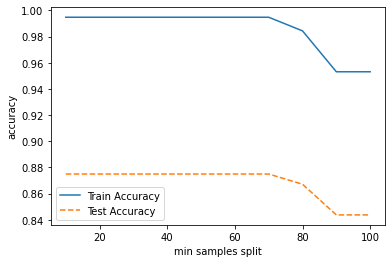

In [128]:
#그래프에서 split 70이후로 일정하게 유지됨을 알 수 있다.
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split")
plt.ylabel("accuracy")
plt.legend()

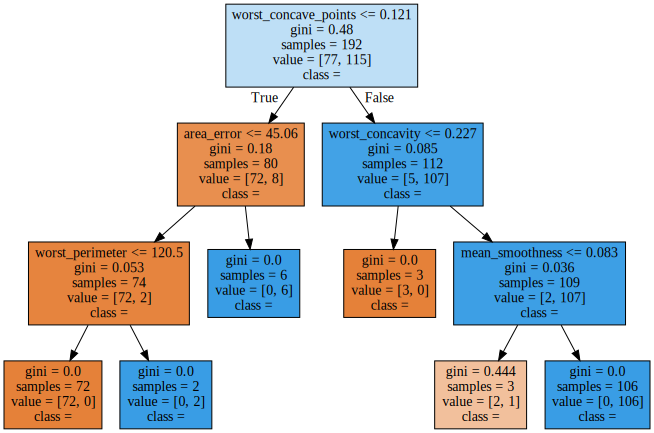

In [161]:
tree_low = DecisionTreeClassifier(max_depth = 4, min_samples_split=70, random_state=1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file="tree_low.dot", class_names = ["양성", "음성"],
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

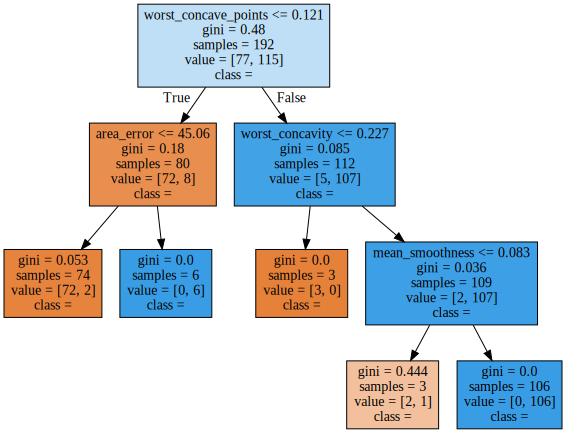

In [162]:
tree_high = DecisionTreeClassifier(max_depth = 4, min_samples_split=80, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file="tree_high.dot", class_names=["양성", "음성"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_high.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 최소 Split Node를 70과 80일 때 정확도가 유사하지만 과적합을 방지하기 위해서 split node를 최대로 유지한다.
## 그러므로 80을 선택했다.

In [131]:
# 최소 잎사귀 개수 수정
train_accuracy = []
test_accuracy = []
para_leaf = [n_leaf * 10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=v_min_samples_leaf, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.953,0.914
1,20,0.932,0.852
2,30,0.932,0.852
3,40,0.932,0.852
4,50,0.932,0.852
5,60,0.932,0.852
6,70,0.932,0.852
7,80,0.932,0.852
8,90,0.917,0.836
9,100,0.599,0.758


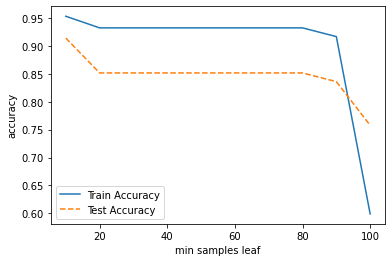

In [132]:
# 최소 잎사귀 수가 60정도일 때 두 정확도가 가장 높고 차이가 적음을 알 수 있다.
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf")
plt.ylabel("accuracy")
plt.legend()

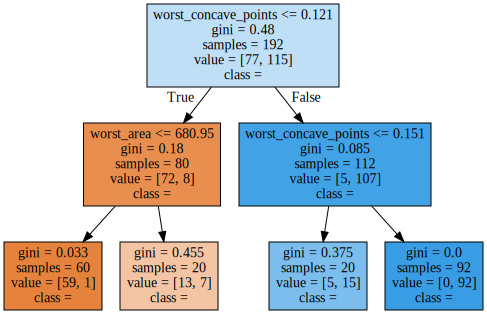

In [165]:
tree_low = DecisionTreeClassifier(max_depth = 4, min_samples_split = 80, min_samples_leaf = 20, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file="tree_low.dot", class_names=["양성", "음성"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

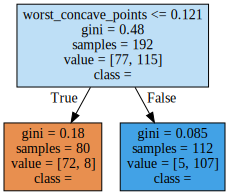

In [166]:
tree_high = DecisionTreeClassifier(max_depth = 4, min_samples_split = 80, min_samples_leaf = 80, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file="tree_high.dot", class_names=["양성", "음성"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_high.dot")as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## 최소 leaf 의 개수를 20으로 했을 때와 80으로 했을 때 정확도는 유사하지만
## 과적합을 방지하기 위해서 최대로 leaf를 유지하는 것이 좋다.
## 그러므로 80을 채택했다

In [167]:
tree_final = DecisionTreeClassifier(max_depth=4, min_samples_split=80, min_samples_leaf=80, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=80, min_samples_split=80,
                       random_state=1234)

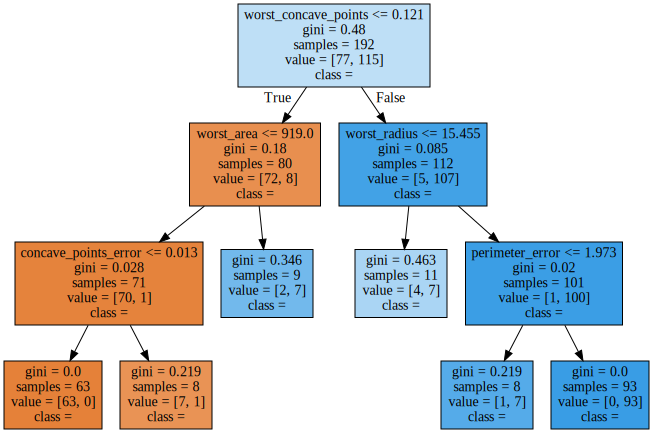

In [136]:
export_graphviz(tree_final, out_file = "tree_final.dot", 
               feature_names = v_feature_name,  class_names=["양성", "음성"],
                impurity = True, filled = True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [168]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.852

Confusion matrix: 
[[23  8]
 [11 86]]


## y 변수 정확도는 85.15%이다.
## 정분류율 = (23 + 86) / (23 + 86 + 11 + 8) = 85.15% 이다

In [169]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
27,worst_concave_points,1.0
0,mean_radius,0.0
1,mean_texture,0.0
28,worst_symmetry,0.0
26,worst_concavity,0.0
25,worst_compactness,0.0
24,worst_smoothness,0.0
23,worst_area,0.0
22,worst_perimeter,0.0
21,worst_texture,0.0


Text(0, 0.5, '설명변수')

/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib

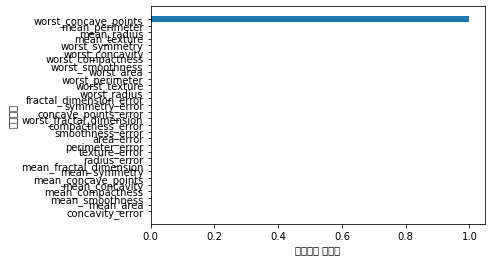

In [170]:
df_importance.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# worst_concave_points라는 변수가 모델에 가장 큰 영향력을 가지고 있다는 것을 확인할 수 있다.

# 랜덤 포레스트

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [172]:
#파일 불러오기
df_raw = pd.read_csv("3. Big Data 분석/유방암.csv", engine='python', encoding='cp949')
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [173]:
df_raw.isnull().sum(axis = 0) #결측치 개수 확인 -> 결측치가 없으므로 처리 불필요

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [174]:
# diagnosis 변수 "양성" or "음성"을 1과 0으로 바꾼다.
df_raw["diagnosis"] = np.where(df_raw["diagnosis"] == "양성", 0, 1)
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,1,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,0,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,1,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,0,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,0,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [175]:
# 목표 변수 diagnosis를 y로 설정하고 나머지 변수들을 x로 나눈다.
df_raw_y = df_raw["diagnosis"]
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.4, random_state = 1234)

In [176]:
# 트레이닝 셋에 대해 100%로 과적합이 발생했다.
rf_uncusomized = RandomForestClassifier(random_state = 1234)
rf_uncusomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(rf_uncusomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncusomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.914


In [177]:
#10 ~ 150까지 n을 10씩 증가시키면서 트리의 개수 파라미터를 조정한다.
train_accuracy = []
test_accuracy = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

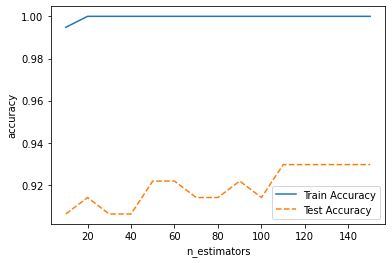

In [178]:
#그래프를 보면 110정도 부터 테스트 데이터의 정확도가 증가하지 않음을 알 수 있다.
df_accuracy_n.round(3)
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.legend()

In [179]:
oob_error = []

for v_n_estimator in range(1, 151):
    rf = RandomForestClassifier(n_estimators=v_n_estimator, oob_score = True, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score)

/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:540: UserWarning: Some inputs do 

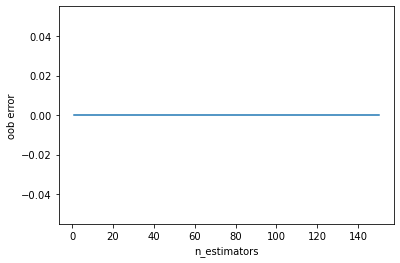

In [180]:
# oob error가 모든 n에 대해 0이므로 모든 데이터를 모델 생성에 사용했음을 알 수 있다.
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

n_estimators = 100

In [181]:
# 트리의 깊이(Depth)를 조정한다.
# depth 4부터 트레이닝 정확도와 테스트 데이터가 고정되어 더 이상 증가하지 않음을 알 수 있다.
train_accuracy = []
test_accuracy = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(n_estimators=100, max_depth=v_max_depth, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.953,0.922
1,2,0.974,0.906
2,3,0.990,0.906
3,4,1.000,0.914
4,5,1.000,0.914
5,6,1.000,0.914
6,7,1.000,0.914
7,8,1.000,0.914
8,9,1.000,0.914
9,10,1.000,0.914


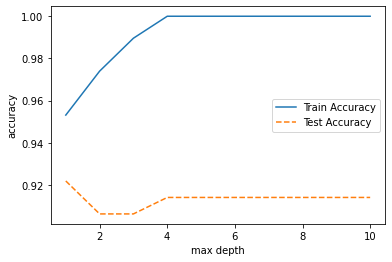

In [182]:
# depth 4부터 계속 일정하게 유지되는 것을 알 수 있다.
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.legend()

In [183]:
# 최소 split노드 개수를 수정한다.
train_accuracy = []
test_accuracy = []
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=v_min_samples_split, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.990,0.914
1,20,0.984,0.906
2,30,0.979,0.906
3,40,0.979,0.906
4,50,0.979,0.906
5,60,0.953,0.891
6,70,0.953,0.898
7,80,0.953,0.922
8,90,0.953,0.922
9,100,0.953,0.922


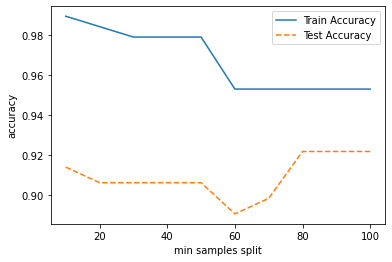

In [184]:
#그래프에서 split 80이후로 일정하게 유지됨을 알 수 있다.
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples split")
plt.ylabel("accuracy")
plt.legend()

In [185]:
# 최소 잎사귀 개수 수정
train_accuracy = []
test_accuracy = []
para_leaf = [n_leaf * 10 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_leaf=v_min_samples_leaf, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.969,0.906
1,20,0.958,0.914
2,30,0.953,0.898
3,40,0.953,0.922
4,50,0.964,0.914
5,60,0.943,0.922
6,70,0.599,0.758
7,80,0.599,0.758
8,90,0.599,0.758
9,100,0.599,0.758


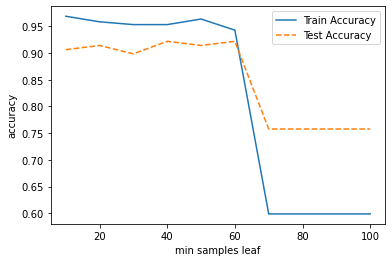

In [186]:
# 최소 잎사귀 수가 60정도일 때 두 정확도가 가장 높고 차이가 적음을 알 수 있다.
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.xlabel("min samples leaf")
plt.ylabel("accuracy")
plt.legend()

In [187]:
#결론 최소 잎사귀 60, 트리 개수 100, 최대 깊이 4, split 80으로 설정했다.
rf_final = RandomForestClassifier(min_samples_leaf=60, max_depth=4, n_estimators=100, random_state=1234)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)

print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set:{:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.943
Accuracy on test set:0.922

Confusion matrix: 
[[28  3]
 [ 7 90]]


In [188]:
v_feature_name = df_train_x.columns

df_importance= pd.DataFrame()
df_importance["Feature"]= v_feature_name
df_importance["Importance"]= rf_final.feature_importances_
#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
22,worst_perimeter,0.206
6,mean_concavity,0.127
27,worst_concave_points,0.127
7,mean_concave_points,0.095
23,worst_area,0.095
20,worst_radius,0.079
2,mean_perimeter,0.079
3,mean_area,0.063
13,area_error,0.032
17,concave_points_error,0.032


Text(0, 0.5, '변수')

/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Daeho/opt/anaconda3/lib/python3.8/site-packages/matplotlib

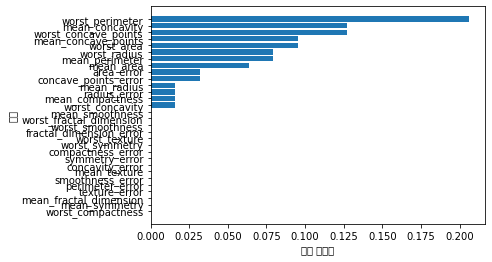

In [189]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance",ascending=True,inplace= True)
coordinates= range(len(df_importance))
plt.barh(y= coordinates,width=df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# worst perimeter가 모델에 가장 큰 영향력을 가진다는 것을 알 수 있다.